In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
#Read the csv file
live_stock = pd.read_csv("GLEAM_LivestockEmissions.csv")
live_stock

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12,...,1.740732e+11,7.419864e+11,4.687954e+10,3.870062e+11,2.509275e+12,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11,...,7.166208e+10,2.543885e+11,1.497421e+10,NaN,8.856352e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11,...,1.024111e+11,4.875979e+11,3.190534e+10,3.870062e+11,1.623640e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11,...,5.253660e+10,4.267612e+11,8.194330e+09,3.870062e+11,9.969096e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11,...,2.156126e+10,1.587838e+11,2.412100e+09,NaN,3.369018e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Western Europe,Chicken,Layers,Aggregated,22.0,6.025046e+08,1.323780e+10,9.323248e+09,3.332783e+08,3.581273e+09,...,1.730664e+09,8.947222e+08,3.772893e+09,NaN,NaN,3.332783e+08,9.558861e+08,5.803359e+08,3.967689e+07,9.548171e+08
579,Western Europe,Chicken,Layers,Eggs,21.9,5.681959e+08,1.243977e+10,8.761355e+09,3.119144e+08,3.366500e+09,...,1.627899e+09,8.506486e+08,3.553528e+09,NaN,NaN,3.119144e+08,8.879524e+08,5.388376e+08,3.661863e+07,8.973380e+08
580,Western Europe,Chicken,Layers,Meat,23.3,3.430870e+07,7.980299e+08,5.618929e+08,2.136393e+07,2.147731e+08,...,1.027658e+08,4.407360e+07,2.193647e+08,NaN,NaN,2.136393e+07,6.793370e+07,4.149825e+07,3.058259e+06,5.747911e+07
581,Western Europe,Chicken,Broilers,Aggregated,31.4,9.068378e+08,2.843091e+10,2.197089e+10,4.295646e+08,6.030449e+09,...,3.519630e+09,1.680583e+09,9.587620e+09,NaN,NaN,4.295646e+08,8.302351e+08,2.679845e+09,4.823241e+08,1.516810e+09


In [3]:
#Printing all the columns
live_stock.columns

Index(['Region', 'Animal species', 'Production system', 'Commodity',
       'Emission Intensity (kg CO2e per kg protein)',
       'Production (kg protein)', 'Total GHG emissions (kg CO2e)',
       'Total CO2 emissions (kg CO2e)', 'Total CH4 emissions (kg CO2e)',
       'Total N2O emissions (kg CO2e)', 'Feed, CO2 (kg CO2e)',
       'Feed, CH4 (kg CO2e)',
       'Feed: fertilizer & crop residues, N2O (kg CO2e)',
       'Feed: applied & deposited manure, N2O (kg CO2e)',
       'LUC: soy & palm, CO2 (kg CO2e)',
       'LUC: pasture expansion, CO2 (kg CO2e)',
       'Enteric fermentation, CH4 (kg CO2e)',
       'Manure management, CH4 (kg CO2e)', 'Manure management, N2O (kg CO2e)',
       'Direct energy, CO2 (kg CO2e)', 'Indirect energy, CO2 (kg CO2e)',
       'Postfarm, CO2 (kg CO2e)'],
      dtype='object')

In [4]:
#Removing unnecessary columns form dataset
live_stock_subset = live_stock[['Animal species', 'Production system', 'Commodity',
       'Emission Intensity (kg CO2e per kg protein)',
       'Production (kg protein)', 'Total GHG emissions (kg CO2e)', 'Feed, CO2 (kg CO2e)',
       'Feed: fertilizer & crop residues, N2O (kg CO2e)',
       'Feed: applied & deposited manure, N2O (kg CO2e)',
        'LUC: soy & palm, CO2 (kg CO2e)',
       'Manure management, CH4 (kg CO2e)', 'Manure management, N2O (kg CO2e)',
       'Direct energy, CO2 (kg CO2e)', 'Indirect energy, CO2 (kg CO2e)',
       'Postfarm, CO2 (kg CO2e)']]

live_stock_subset

,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,3.534729e+11,1.740732e+11,7.419864e+11,4.687954e+10,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,1.382340e+11,7.166208e+10,2.543885e+11,1.497421e+10,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,2.152389e+11,1.024111e+11,4.875979e+11,3.190534e+10,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,1.113982e+11,5.253660e+10,4.267612e+11,8.194330e+09,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,4.404003e+10,2.156126e+10,1.587838e+11,2.412100e+09,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Chicken,Layers,Aggregated,22.0,6.025046e+08,1.323780e+10,3.975525e+09,1.730664e+09,8.947222e+08,3.772893e+09,3.332783e+08,9.558861e+08,5.803359e+08,3.967689e+07,9.548171e+08
579,Chicken,Layers,Eggs,21.9,5.681959e+08,1.243977e+10,3.735033e+09,1.627899e+09,8.506486e+08,3.553528e+09,3.119144e+08,8.879524e+08,5.388376e+08,3.661863e+07,8.973380e+08
580,Chicken,Layers,Meat,23.3,3.430870e+07,7.980299e+08,2.404925e+08,1.027658e+08,4.407360e+07,2.193647e+08,2.136393e+07,6.793370e+07,4.149825e+07,3.058259e+06,5.747911e+07
581,Chicken,Broilers,Aggregated,31.4,9.068378e+08,2.843091e+10,7.704294e+09,3.519630e+09,1.680583e+09,9.587620e+09,4.295646e+08,8.302351e+08,2.679845e+09,4.823241e+08,1.516810e+09


# 1. Detecting Null values

In [5]:
live_stock_subset.isnull().sum()

Animal species                                       0
Production system                                    0
Commodity                                            0
Emission Intensity (kg CO2e per kg protein)          0
Production (kg protein)                             40
Total GHG emissions (kg CO2e)                       40
Feed, CO2 (kg CO2e)                                 40
Feed: fertilizer & crop residues, N2O (kg CO2e)     40
Feed: applied & deposited manure, N2O (kg CO2e)     40
LUC: soy & palm, CO2 (kg CO2e)                     143
Manure management, CH4 (kg CO2e)                    40
Manure management, N2O (kg CO2e)                    55
Direct energy, CO2 (kg CO2e)                        80
Indirect energy, CO2 (kg CO2e)                      71
Postfarm, CO2 (kg CO2e)                             92
dtype: int64

<Axes: >

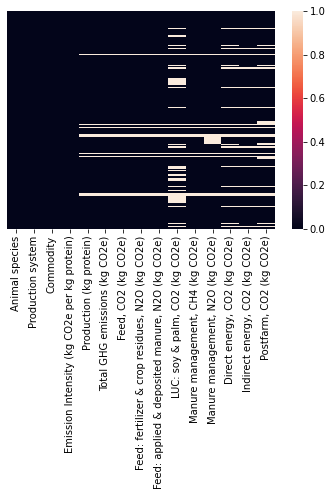

In [6]:
sns.heatmap(live_stock_subset.isnull(),yticklabels=False)

In [7]:
#Describe the dataset
live_stock_subset.describe()

,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),"Feed, CO2 (kg CO2e)","Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
count,583.000000,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,5.430000e+02,4.400000e+02,5.430000e+02,5.280000e+02,5.030000e+02,5.120000e+02,4.910000e+02
mean,122.485592,9.847297e+08,1.047787e+11,1.265408e+10,6.053283e+09,1.474239e+10,4.710816e+09,4.067491e+09,4.209361e+09,1.805007e+09,4.360864e+08,3.425855e+09
std,111.781524,2.664848e+09,3.327099e+11,3.377985e+10,1.589281e+10,5.198160e+10,1.579430e+10,1.445433e+10,1.242832e+10,5.394843e+09,1.273909e+09,9.717207e+09
min,0.000000,7.160000e+02,1.635180e+05,2.210000e+03,1.075000e+03,3.276100e+04,2.290000e+02,4.372000e+03,2.438600e+04,1.230000e+02,1.530000e+03,1.167000e+03
25%,37.600000,2.109760e+07,1.896682e+09,1.570594e+08,7.528522e+07,1.502702e+08,4.636938e+06,5.571113e+07,6.033655e+07,1.065198e+07,1.075023e+07,3.893655e+07
50%,89.500000,1.302244e+08,1.376529e+10,1.595352e+09,7.502423e+08,1.643056e+09,9.752083e+07,3.409117e+08,4.997761e+08,1.395083e+08,6.816491e+07,2.081422e+08
75%,177.000000,7.096944e+08,6.712900e+10,7.701123e+09,3.616861e+09,9.072129e+09,1.284055e+09,2.049098e+09,2.607362e+09,1.055601e+09,3.040099e+08,1.657166e+09
max,643.800000,2.916310e+10,4.674630e+12,3.534729e+11,1.740732e+11,7.419864e+11,1.654074e+11,1.901796e+11,1.649130e+11,5.500667e+10,1.585653e+10,9.955932e+10


In [8]:
#show data types of all the columns
live_stock_subset.dtypes

Animal species                                      object
Production system                                   object
Commodity                                           object
Emission Intensity (kg CO2e per kg protein)        float64
Production (kg protein)                            float64
Total GHG emissions (kg CO2e)                      float64
Feed, CO2 (kg CO2e)                                float64
Feed: fertilizer & crop residues, N2O (kg CO2e)    float64
Feed: applied & deposited manure, N2O (kg CO2e)    float64
LUC: soy & palm, CO2 (kg CO2e)                     float64
Manure management, CH4 (kg CO2e)                   float64
Manure management, N2O (kg CO2e)                   float64
Direct energy, CO2 (kg CO2e)                       float64
Indirect energy, CO2 (kg CO2e)                     float64
Postfarm, CO2 (kg CO2e)                            float64
dtype: object

array([[<Axes: title={'center': 'Emission Intensity (kg CO2e per kg protein)'}>,
        <Axes: title={'center': 'Production (kg protein)'}>,
        <Axes: title={'center': 'Total GHG emissions (kg CO2e)'}>],
       [<Axes: title={'center': 'Feed, CO2 (kg CO2e)'}>,
        <Axes: title={'center': 'Feed: fertilizer & crop residues, N2O (kg CO2e)'}>,
        <Axes: title={'center': 'Feed: applied & deposited manure, N2O (kg CO2e)'}>],
       [<Axes: title={'center': 'LUC: soy & palm, CO2 (kg CO2e)'}>,
        <Axes: title={'center': 'Manure management, CH4 (kg CO2e)'}>,
        <Axes: title={'center': 'Manure management, N2O (kg CO2e)'}>],
       [<Axes: title={'center': 'Direct energy, CO2 (kg CO2e)'}>,
        <Axes: title={'center': 'Indirect energy, CO2 (kg CO2e)'}>,
        <Axes: title={'center': 'Postfarm, CO2 (kg CO2e)'}>]],
      dtype=object)

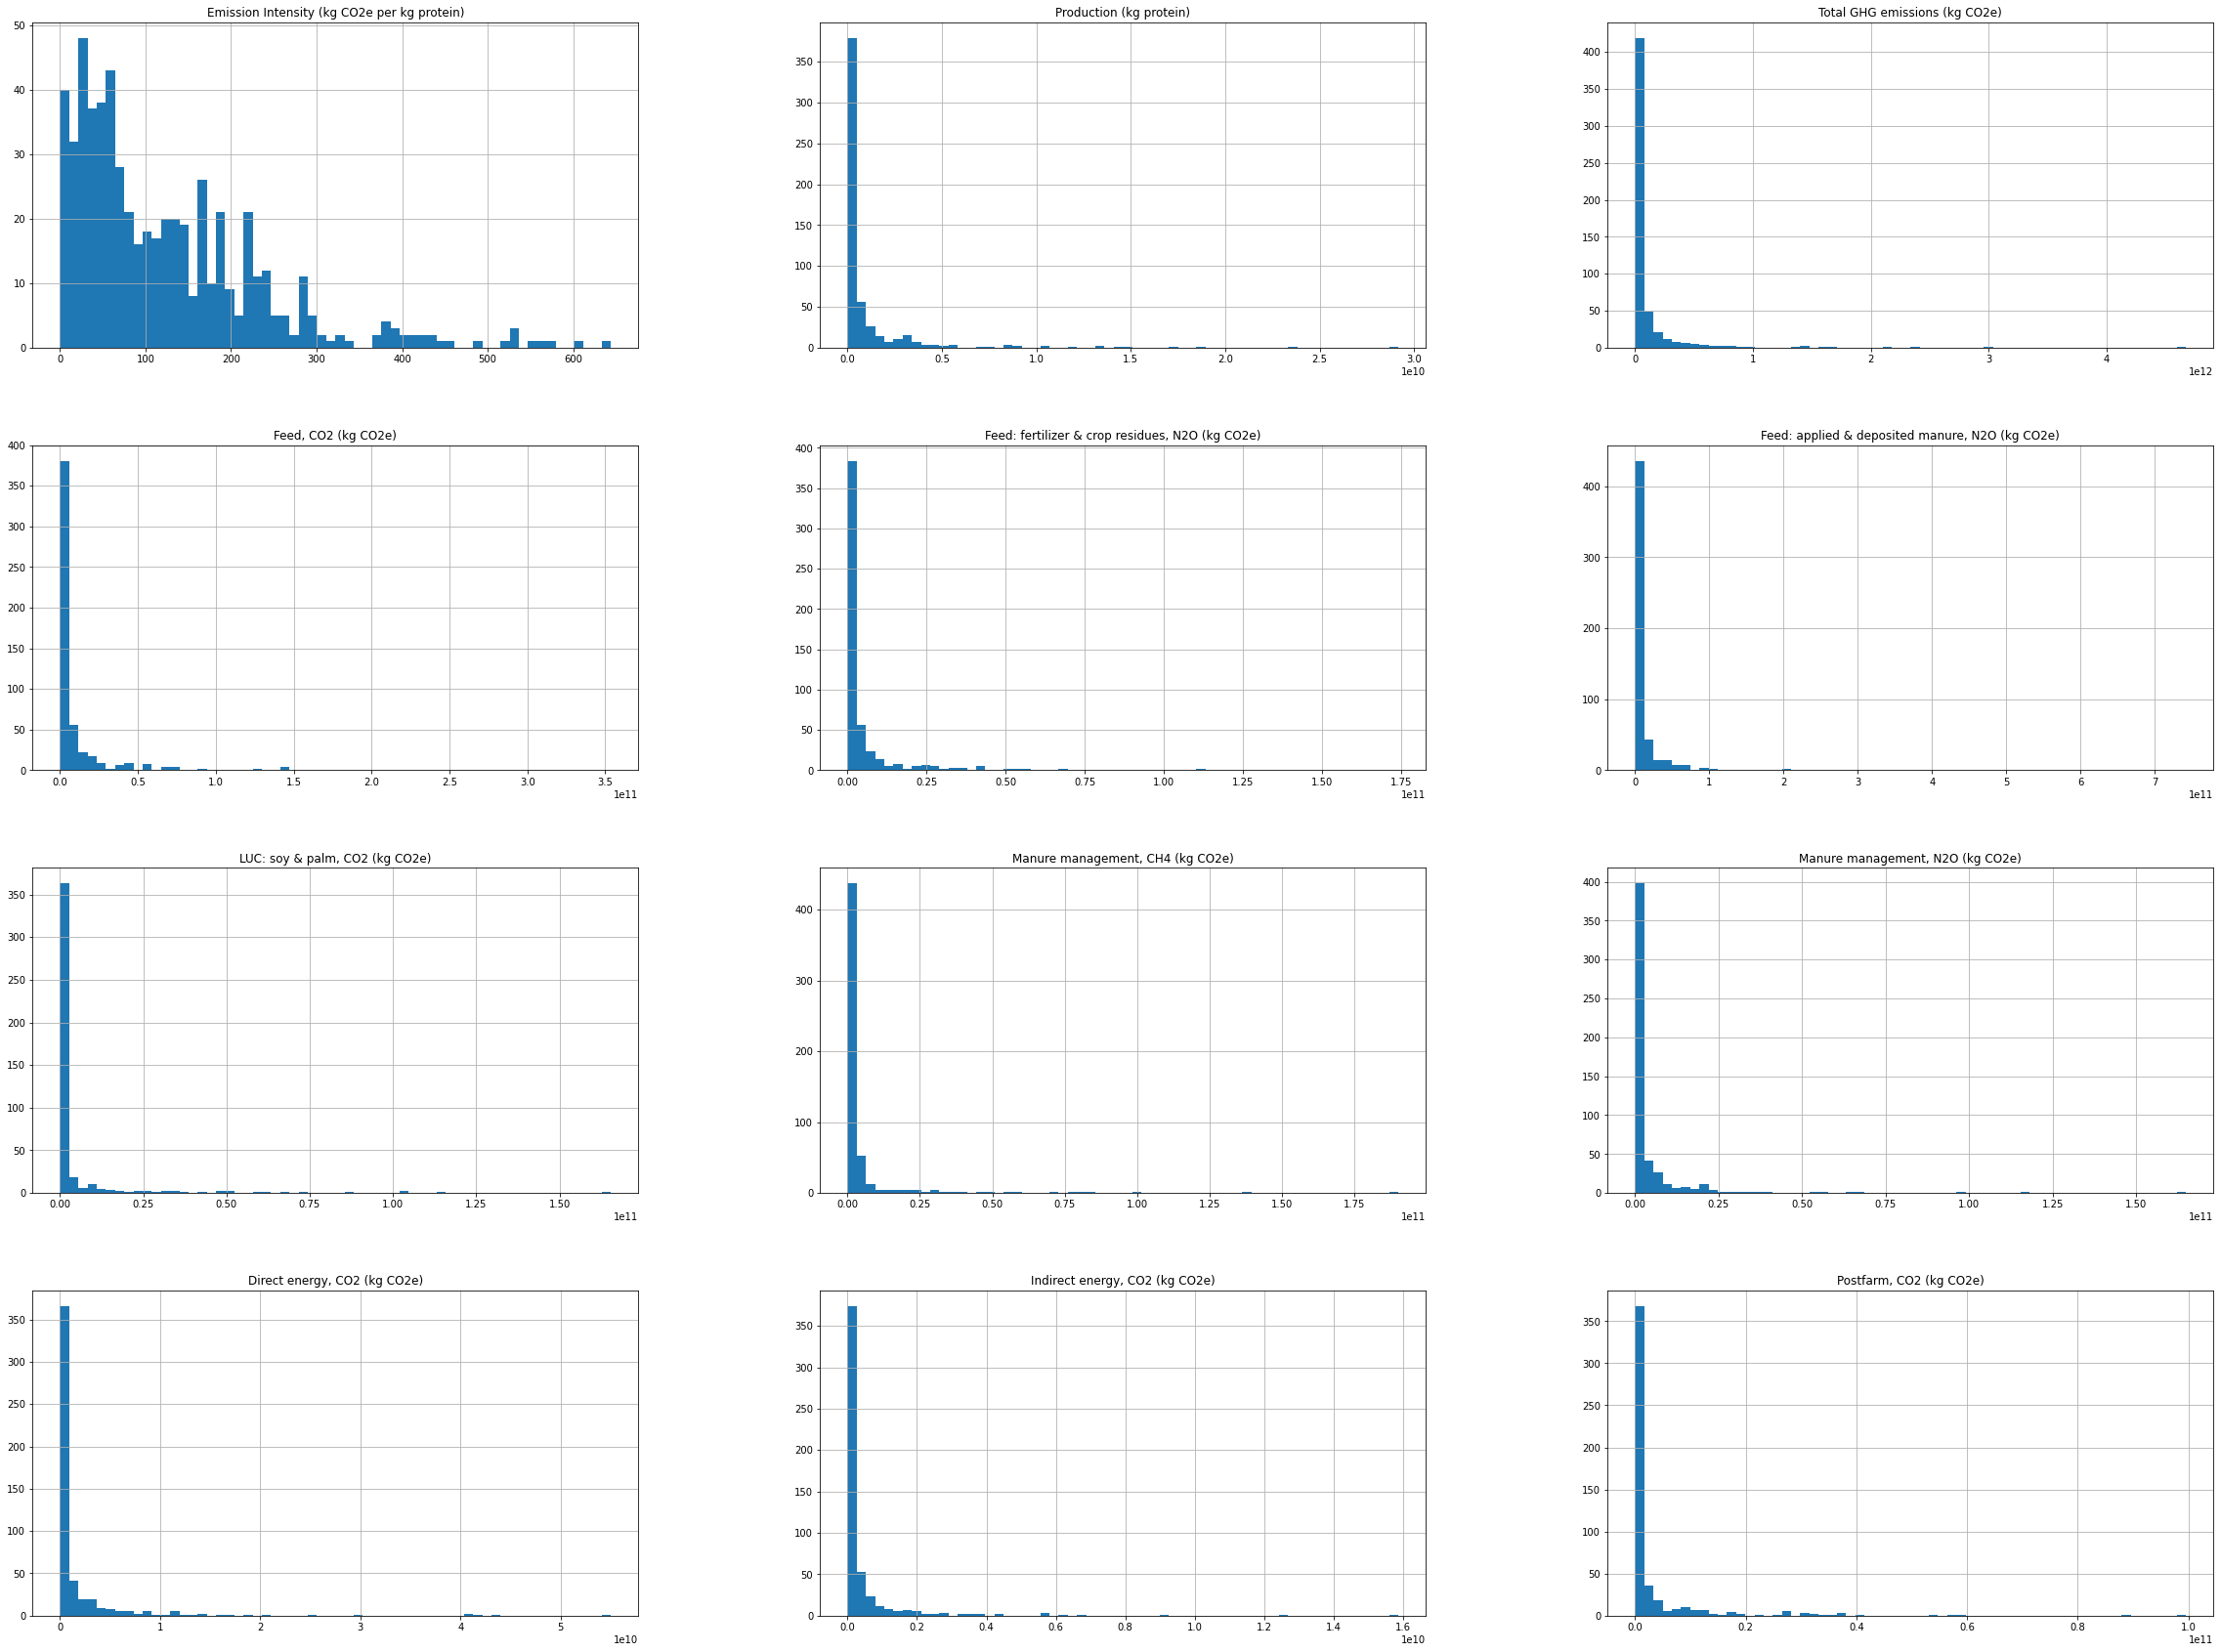

In [14]:
#Draw histograms 
live_stock_subset.hist(bins=60,figsize=(40,30))

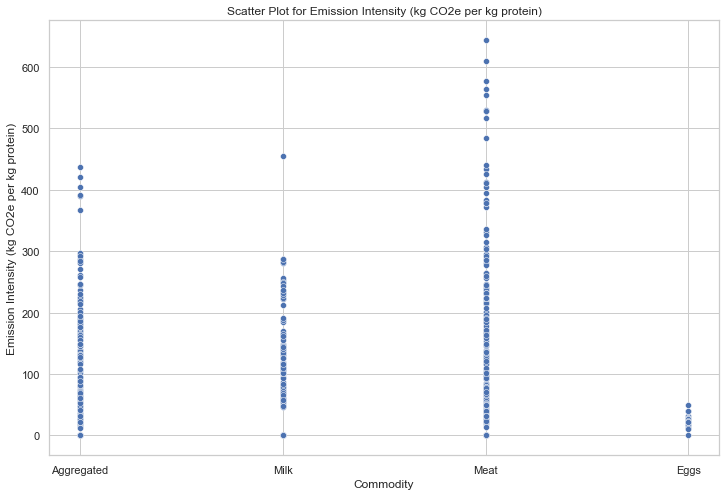

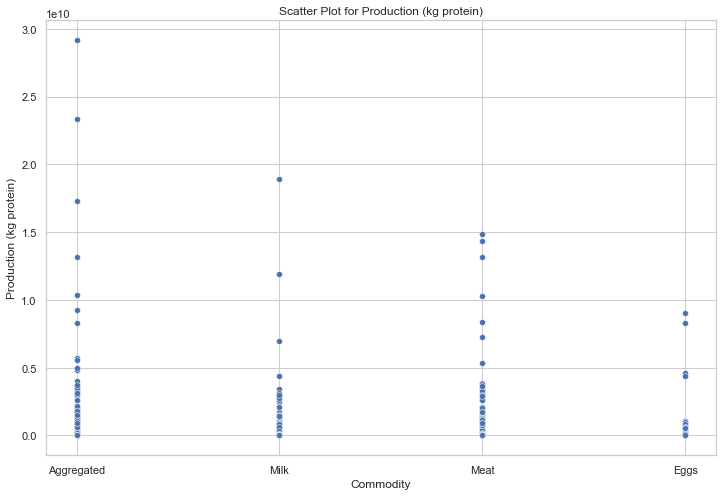

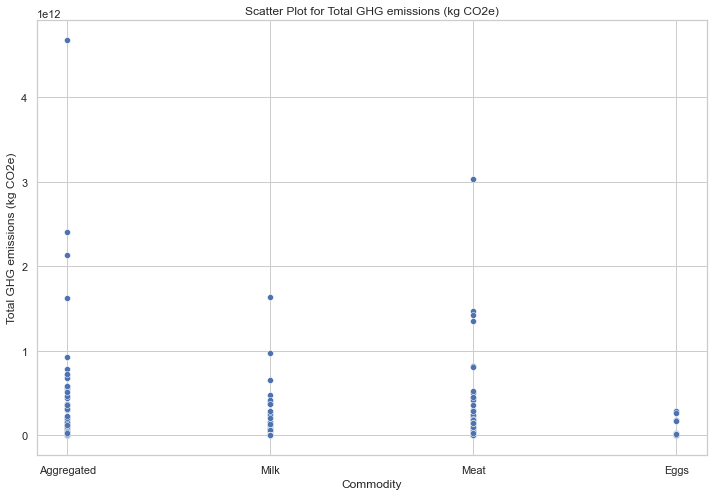

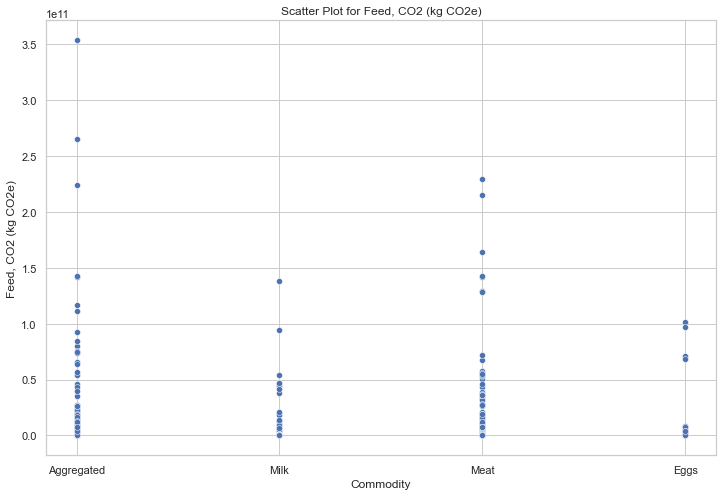

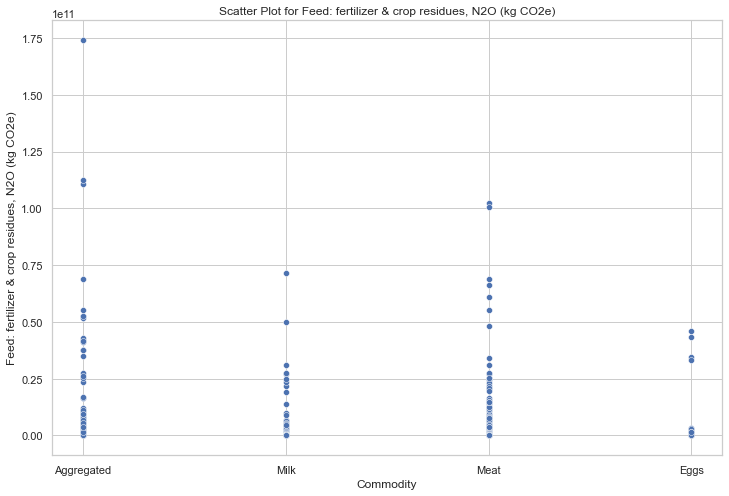

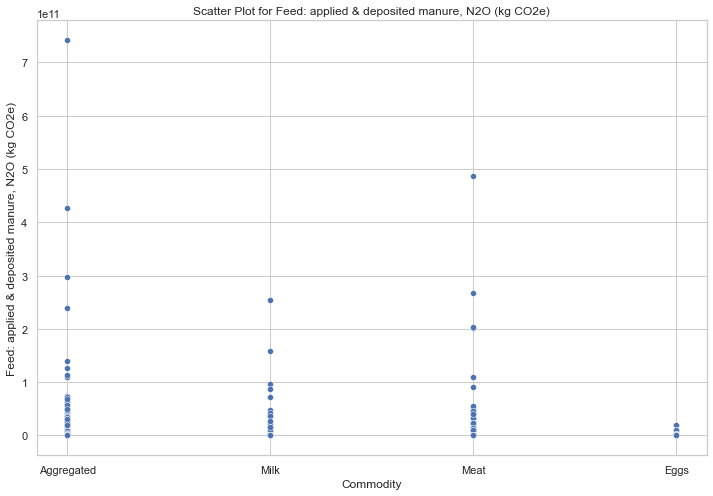

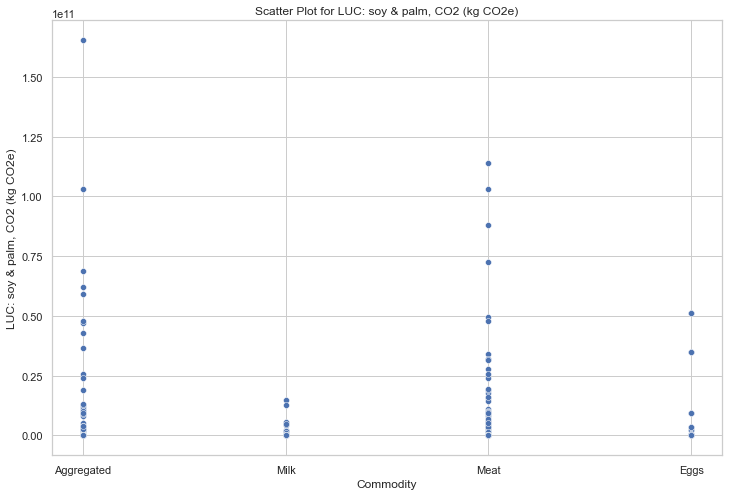

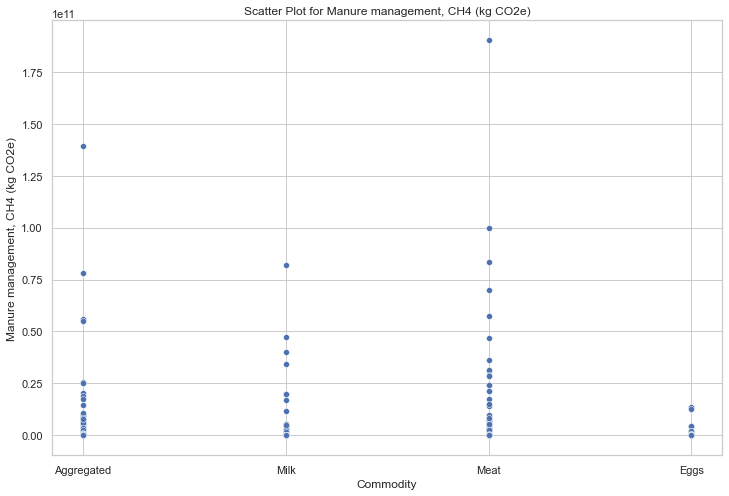

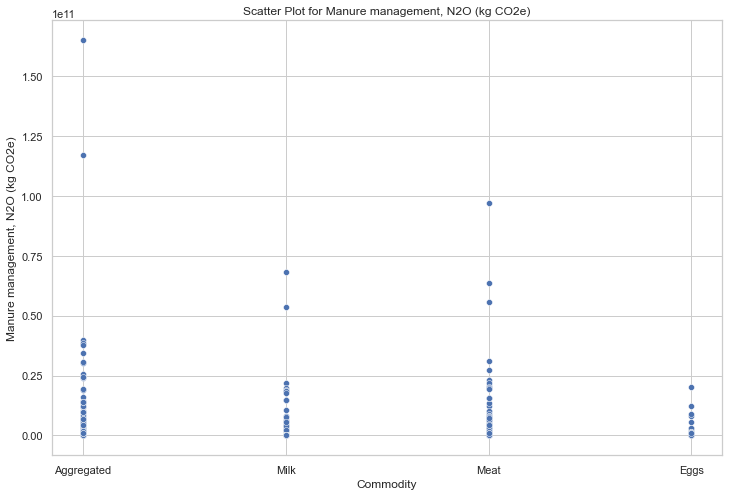

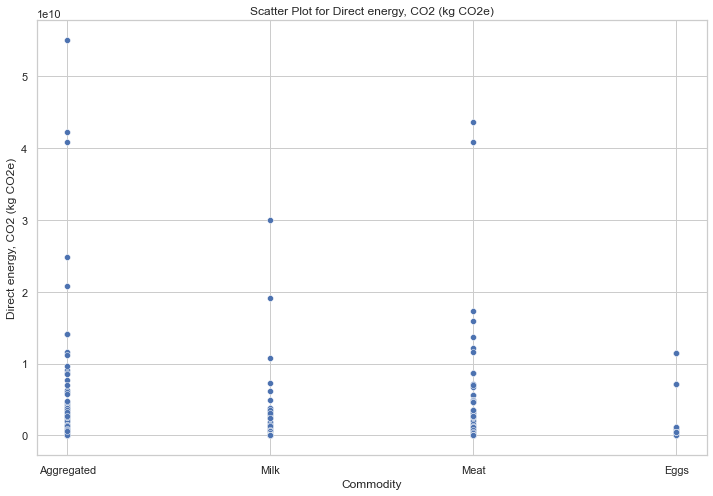

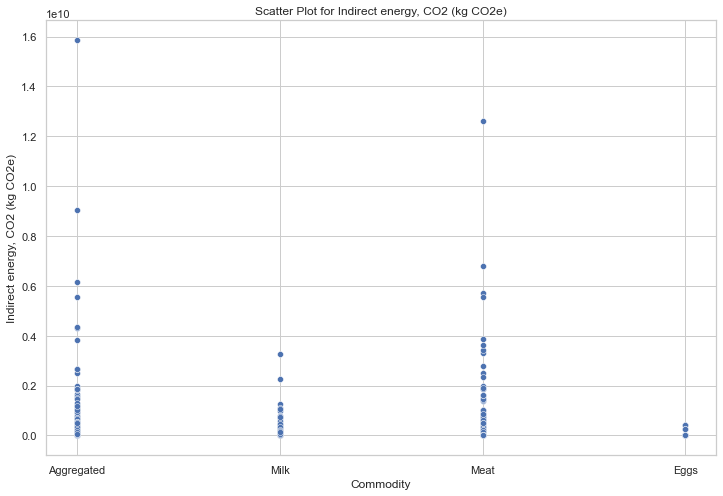

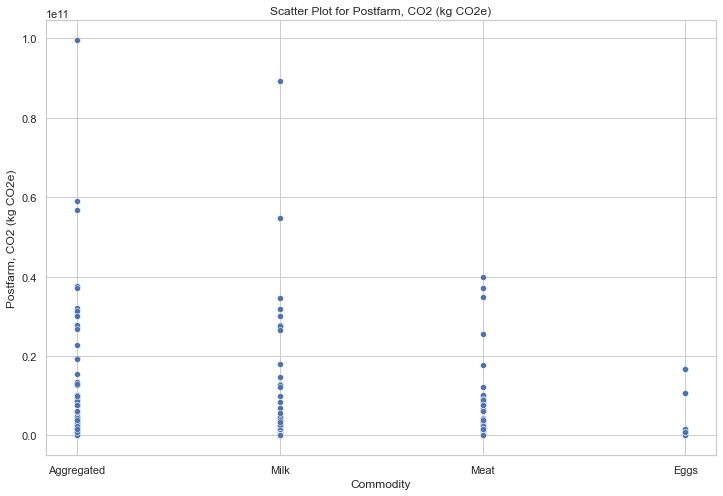

In [19]:
# Filter columns with float64 data type
float_columns = live_stock_subset.select_dtypes(include='float64').columns

# Set the style of the visualization
sns.set(style="whitegrid")

# Iterate through each column and create scatter plots
for column in float_columns:
    plt.figure(figsize=(12, 8))  # Set the figure size
    sns.scatterplot(x='Commodity', y=column, data=live_stock_subset)
    plt.title(f'Scatter Plot for {column}')
    plt.xlabel('Commodity')
    plt.ylabel(column)
    plt.show()


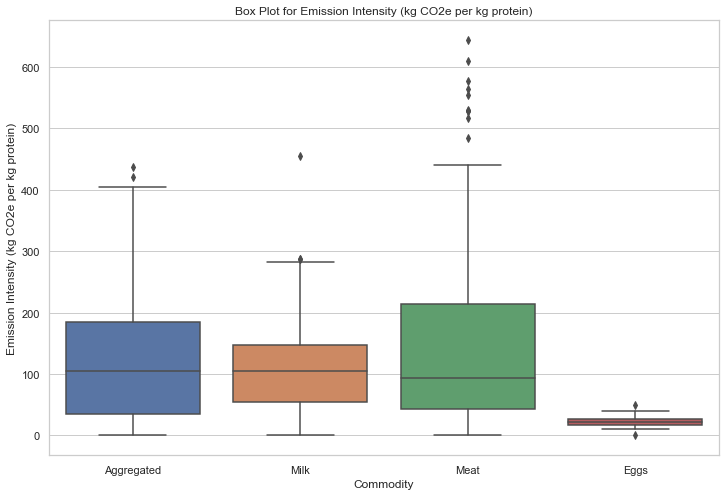

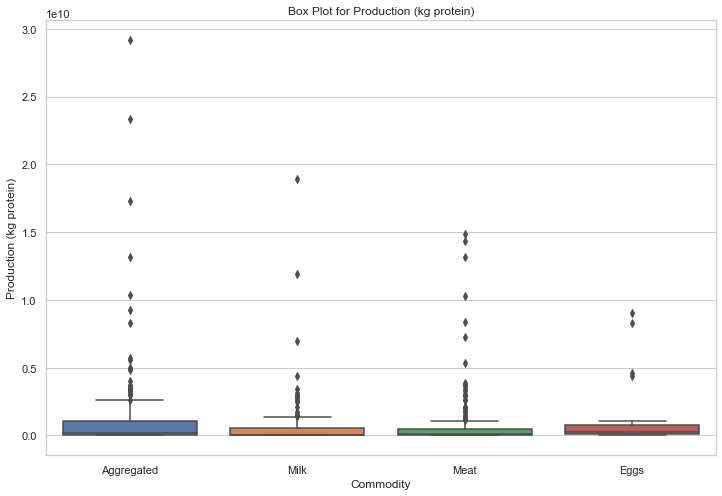

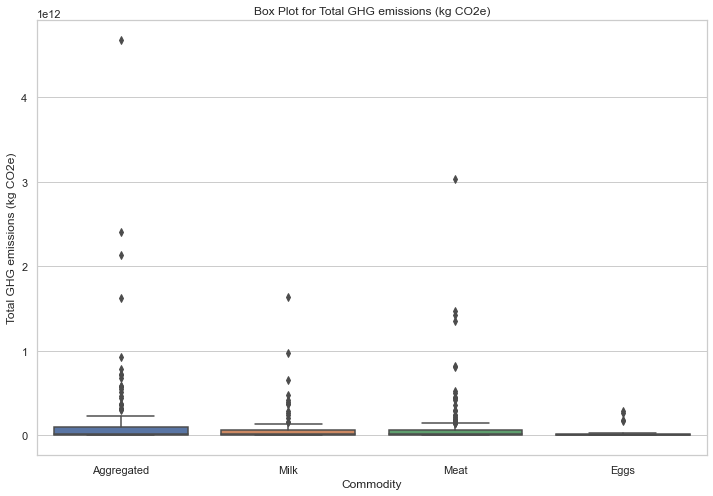

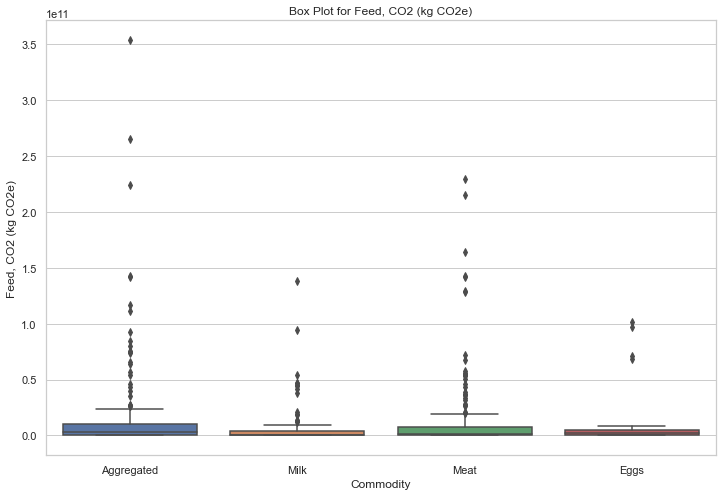

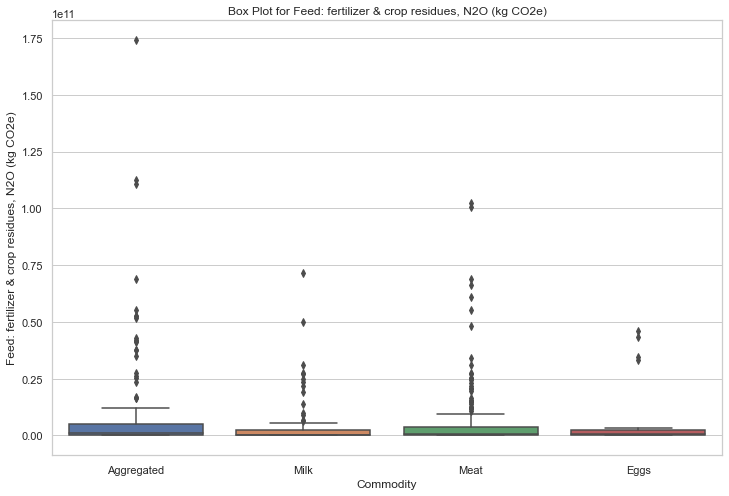

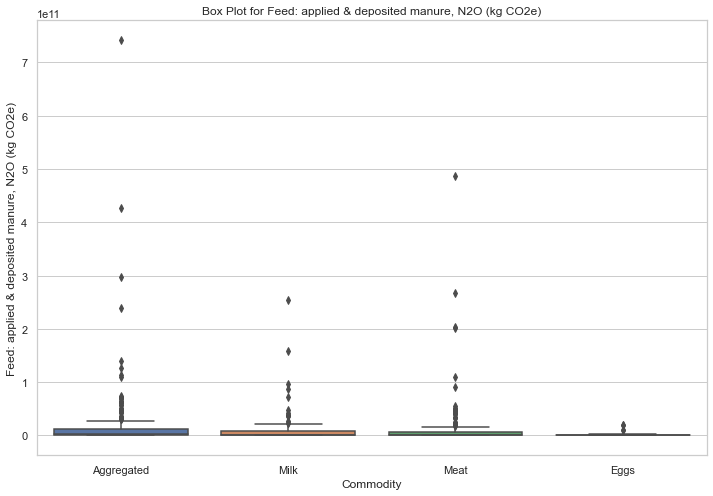

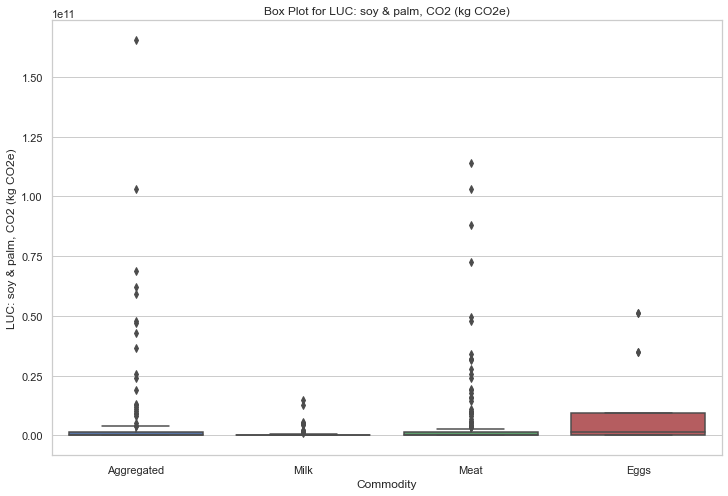

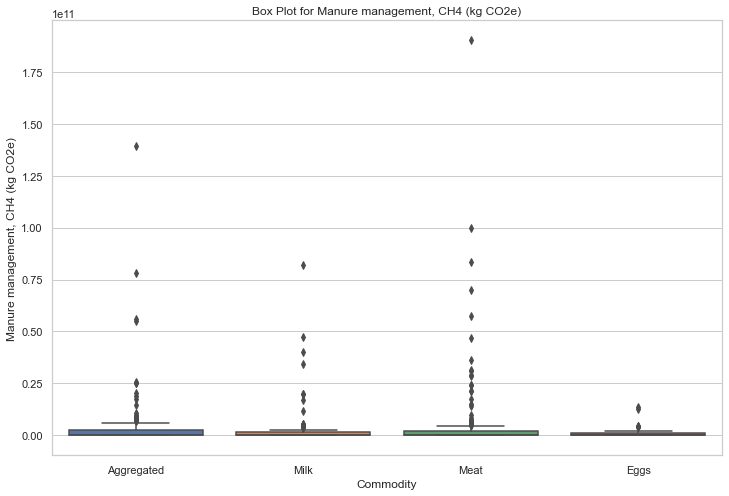

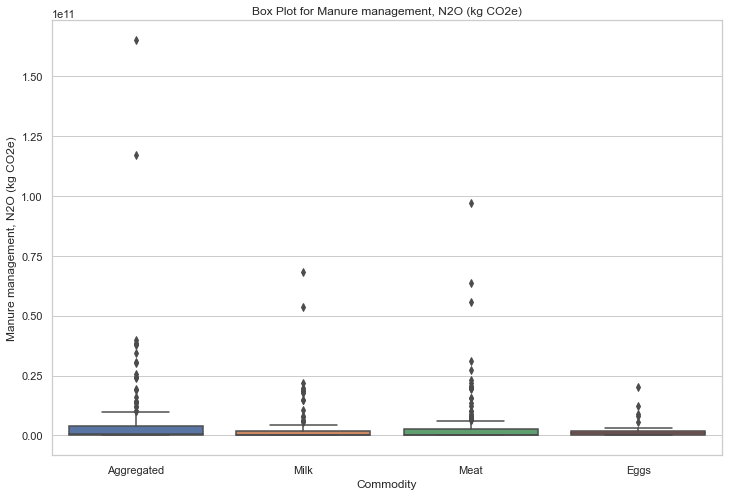

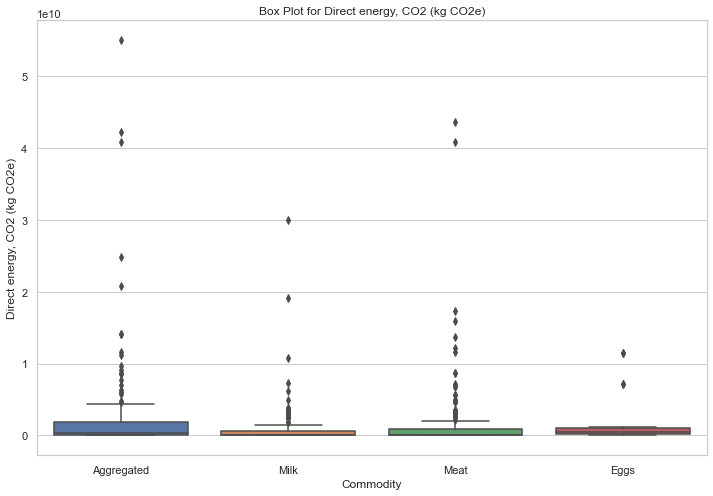

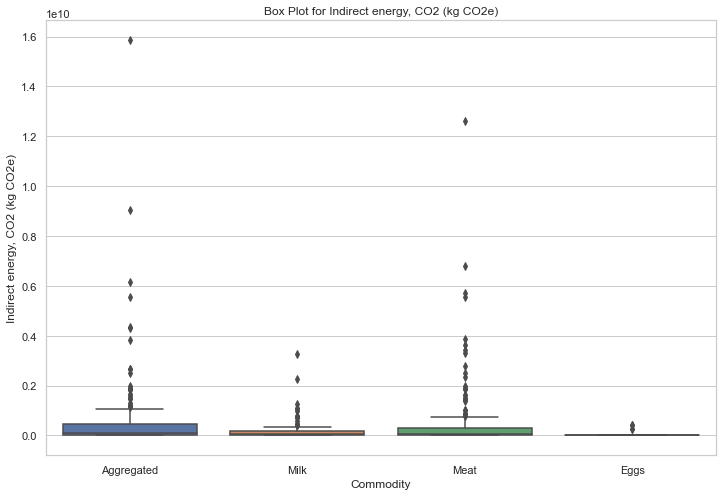

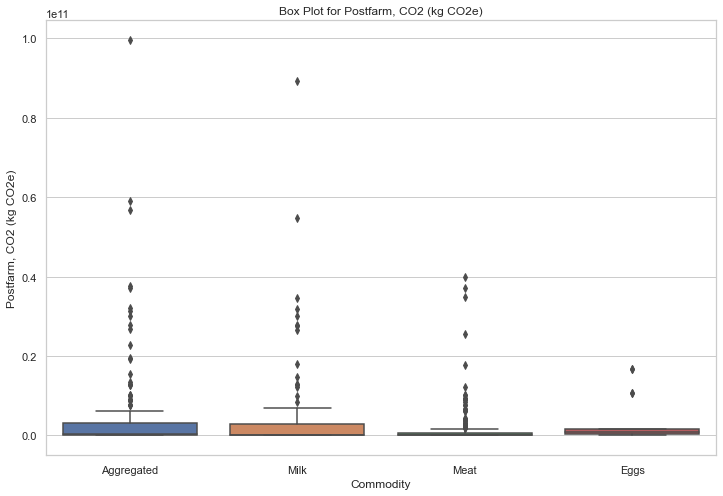

In [20]:
#Identifing the outliers of each column

# Filter columns with float64 data type
float_columns = live_stock_subset.select_dtypes(include='float64').columns

# Set the style of the visualization
sns.set(style="whitegrid")

# Iterate through each column and create box plots
for column in float_columns:
    plt.figure(figsize=(12, 8))  # Set the figure size
    sns.boxplot(x='Commodity', y=column, data=live_stock_subset)
    plt.title(f'Box Plot for {column}')
    plt.xlabel('Commodity')
    plt.ylabel(column)
    plt.show()
